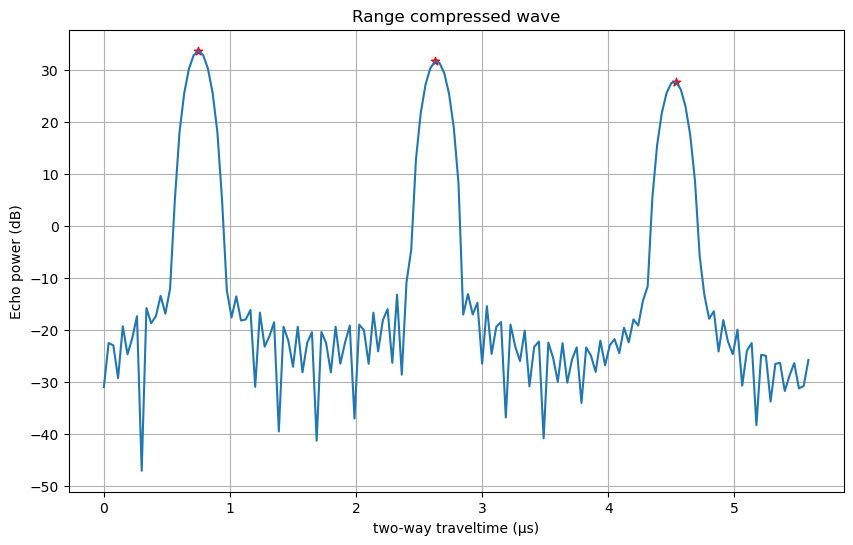

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
from PPMfoward import simulator_1D


# basical parameters of chirp
f_start = 25e6          # SHARAD initiall transmitting frequency 
f_end = 15e6            # SHARAD end frequency 
T = 85.05e-6            # chirp duration time 
fs = 80e6/3             # sampling rate in Hz 
fmin = 5e6 / 3          # matched filter window lower bound frequency in Hz 
fmax = 35e6 / 3         # matched filter window upper bound frequency in Hz 
windowNum = 6           # matched filter window type: 0 for no window, 6 for Hann window

# parameters of the three layered media
true_eps   = np.array([2.0, 4.0, 8.0])                  # permittivity
true_losstangent  = np.array([5e-3, 1e-2, 1e-2])        # loss tangent
true_thicknesses = np.array([200.0, 200/np.sqrt(2)])    # Thickness, the last layer is semi-infinite


# producing chirp and mached filter signals
t = np.arange(1/fs, T, 1/fs)
chirp_signal = chirp(t, f_start, T, f_end, method='linear', phi=0, vertex_zero=True)
mf_signal = np.conj(chirp_signal[::-1])


# calculating the input spectrum
n_samples = len(chirp_signal)
pulse_spec = np.fft.fft(chirp_signal)[:n_samples//2 + 1]
mfpulse_spec = np.fft.fft(mf_signal)[:n_samples//2 + 1]
frequencies = np.fft.fftfreq(n_samples, 1/fs)[1:n_samples//2 + 1] # no zoro component for the input


# Create simulator object
testModel = simulator_1D()
testModel.set_model(pulse_spec, mfpulse_spec, frequencies, fs, fmin, fmax, windowNum)

# simulation result
ridx, syndata = testModel.__runsim__(true_eps, true_losstangent, true_thicknesses)
syndata_power = 20* np.log10(np.abs(syndata))

# x index range for display
id1 = np.argmax(syndata_power) - 20
id2 = id1 + 150

x = np.arange(150)/fs*1e6
y = syndata_power[id1:id2]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.scatter(x[ridx - id1], syndata_power[ridx], c='red', marker='*')
plt.grid()
plt.xlabel('two-way traveltime (μs)')
plt.ylabel('Echo power (dB)')
plt.title('Range compressed wave')
plt.show()